In [112]:
using Plots , LinearAlgebra

In [113]:
N = 1000
h = 0.01
diag = h*h + 2
vector_up = [0; ones(N-2) * (-1)]
vector_diagonal = [1; ones(N-2) * diag; 2]
vector_down = [ones(N-2) * (-1); -1]
vector_b = [1; zeros(N-2); 1]
x_values = 1:N

A = Tridiagonal(vector_down,vector_diagonal,vector_up)
eps = 1e-10

1.0e-10

In [114]:
function conjugated_gradient(A, b, x, eps)
    r = b - A * x
    p = r 
    r_norm = norm(r)
    r_norm0 = r_norm
    n = 1
    while r_norm > eps * r_norm0
        Ap = A * p
        a = r_norm^2 / dot(p, Ap)
        r = r - a * Ap
        r_norm = norm(r)
        c = r_norm^2 / r_norm0^2
        x = x + a * p
        p = r + c * p
        n += 1
    end
    println("Dokładność została osiągnięta po "*string(n)*" iteracjach")
    return x
end

conjugated_gradient (generic function with 2 methods)

Dokładność została osiągnięta po 269750 iteracjach


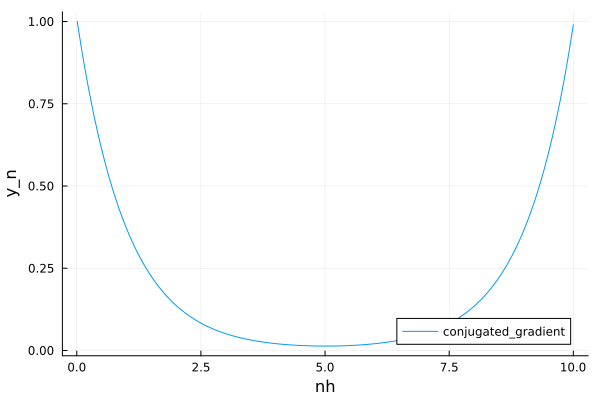

In [115]:
result = conjugated_gradient(A,vector_b,zeros(N))
y_values = [result[n] for n in x_values]
plot(x_values * h, y_values, xlabel="nh", ylabel="y_n", legend=:bottomright, label="conjugated_gradient")